In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [72]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
train_df.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dennis, Mr. Samuel",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [76]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

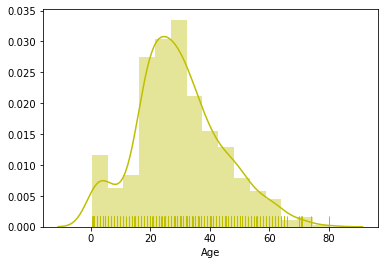

In [78]:
sns.distplot(train_df['Age'],bins=15,color='y',rug=True)
plt.show()

In [79]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

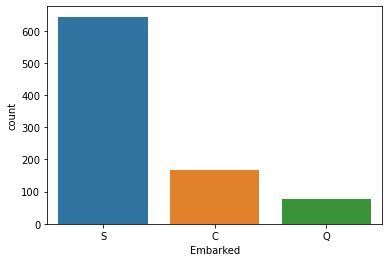

In [80]:
sns.countplot(train_df['Embarked'])
plt.show()

In [81]:
dict_NA={'Age': train_df['Age'].median(),'Embarked': train_df['Embarked'].value_counts().index[0]}
train_df1=train_df.fillna(value=dict_NA)
train_df1.drop('Cabin',axis=1,inplace=True)
train_df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [82]:
train_df1['PassengerId'].nunique()

891

In [83]:
train_df1['Name'].nunique()

891

In [84]:
train_df1['Ticket'].nunique()

681

In [85]:
train_df1['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
370375      1
315088      1
7540        1
2697        1
PC 17599    1
Name: Ticket, Length: 681, dtype: int64

In [86]:
train_df2=train_df1.drop(['PassengerId','Name','Ticket'],axis=1)
train_df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [87]:
train_df2.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
train_df2.describe(include=np.object)

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [89]:
train_df2['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [90]:
train_df2['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [91]:
train_df2['Travel_alone']=np.where(train_df2['SibSp']+train_df2['Parch']>0,0,1)
train_df2['Travel_alone'].value_counts()

1    537
0    354
Name: Travel_alone, dtype: int64

In [92]:
train_df2.drop(['SibSp','Parch'],axis=1,inplace=True)
train_df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel_alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [93]:
import sys
!{sys.executable} -m pip install pyod

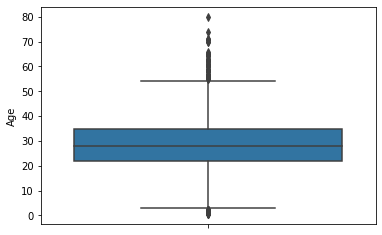

In [94]:
sns.boxplot(train_df2['Age'],data=train_df2,orient='v')

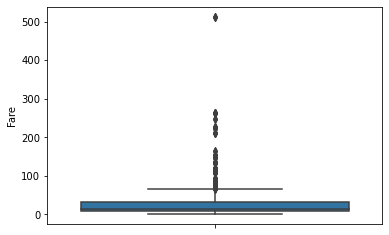

In [95]:
sns.boxplot(train_df2['Fare'],data=train_df2,orient='v')

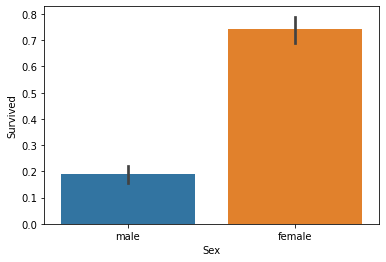

In [96]:
sns.barplot(x='Sex',y='Survived',data=train_df2)

In [97]:
print("Percentage of females survived is: {} %." .format((((train_df2['Survived']==1)[train_df2.Sex=='female']).sum()/(train_df2['Survived']==1).sum())*100))

Percentage of females survived is: 68.12865497076024 %.


In [98]:
print("Percentage of male survived is: {} %." .format((((train_df2['Survived']==1)[train_df2.Sex=='male']).sum()/(train_df2['Survived']==1).sum())*100))

Percentage of male survived is: 31.871345029239766 %.


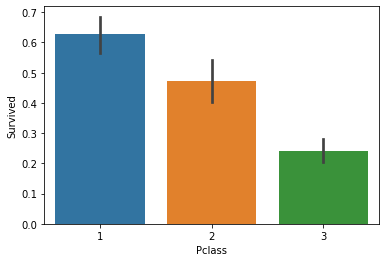

In [99]:
sns.barplot(x='Pclass',y='Survived',data=train_df2)

In [100]:
print("Percentage of 1st class survived is: {} %." .format((((train_df2['Survived']==1)[train_df2.Pclass==1]).sum()/(train_df2['Survived']==1).sum())*100))

Percentage of 1st class survived is: 39.76608187134503 %.


In [101]:
print("Percentage of 2nd class survived is: {} %." .format(((train_df2['Survived'][train_df2.Pclass==2]).sum()/(train_df2['Survived']==1).sum())*100))

Percentage of 2nd class survived is: 25.438596491228072 %.


In [102]:
print("Percentage of 3rd class survived is: {} %." .format(((train_df2['Survived'][train_df2.Pclass==3]).sum()/(train_df2['Survived']==1).sum())*100))

Percentage of 3rd class survived is: 34.7953216374269 %.


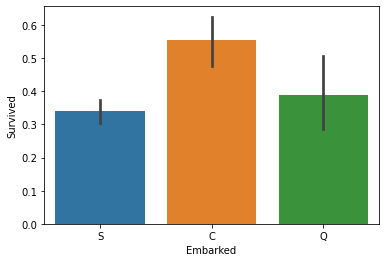

In [103]:
sns.barplot('Embarked','Survived',data=train_df2)

In [104]:
print("Percentage of Embarked S survived is: {} %." .format((((train_df2['Survived']==1)[train_df2.Embarked=='S']).sum()/(train_df2['Survived']==1).sum())*100))

Percentage of Embarked S survived is: 64.03508771929825 %.


In [105]:
print("Percentage of Embarked C survived is: {} %." .format((((train_df2['Survived']==1)[train_df2.Embarked=='C']).sum()/(train_df2['Survived']==1).sum())*100))

Percentage of Embarked C survived is: 27.192982456140353 %.


In [106]:
print("Percentage of Embarked Q survived is: {} %." .format((((train_df2['Survived']==1)[train_df2.Embarked=='Q']).sum()/(train_df2['Survived']==1).sum())*100))

Percentage of Embarked Q survived is: 8.771929824561402 %.


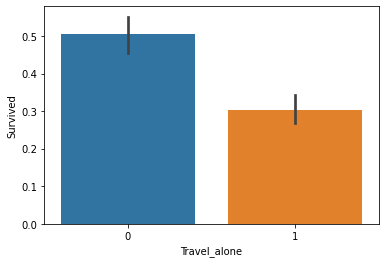

In [107]:
sns.barplot('Travel_alone','Survived',data=train_df2)

In [108]:
train_df3=pd.get_dummies(train_df2,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_df3.head()

,Survived,Age,Fare,Travel_alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,0,1
3,1,35.0,53.1000,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,1,1,0,1


In [109]:
features=train_df3.drop('Survived',axis=1)
y=train_df3['Survived']
features.head(3)

,Age,Fare,Travel_alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,1,0,1
1,38.0,71.2833,0,0,0,0,0,0
2,26.0,7.9250,1,0,1,0,0,1


In [110]:
features.describe()

,Age,Fare,Travel_alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.602694,0.206510,0.551066,0.647587,0.086420,0.725028
std,13.019697,49.693429,0.489615,0.405028,0.497665,0.477990,0.281141,0.446751
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,35.000000,31.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
X=features.values
from pyod.models.knn import KNN
outlier_fraction=0.2
knn_out=KNN(contamination=outlier_fraction)
knn_out.fit(X)
y_out=knn_out.predict(X)
y_out

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [112]:
n_outliers=np.count_nonzero(y_out==1)
n_outliers

146

In [113]:
array=y_out==0
X=X[array,:]
X.shape
#array.shape

(745, 8)

In [114]:
y=y[array]
y.shape


(745,)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [117]:
logreg=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=28)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.8169642857142857

In [118]:
confusion_matrix(y_test,y_pred)

array([[126,  16],
       [ 25,  57]])

Text(0.5, 1.0, 'ROC Curve')

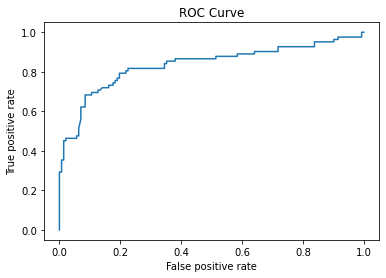

In [119]:
y_pred_prob=logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")

In [120]:
roc_auc_score(y_test,y_pred_prob)

0.8359240810717967

In [166]:
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [167]:
test_df.shape

(418, 11)

In [168]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

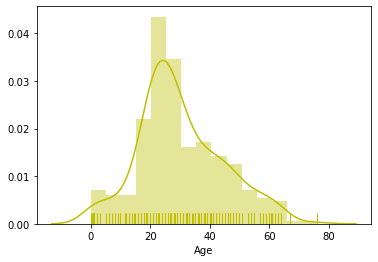

In [169]:
sns.distplot(test_df['Age'],bins=15,color='y',rug=True)
plt.show()

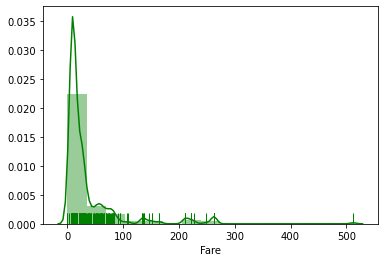

In [170]:
sns.distplot(test_df['Fare'],bins=15,color='g',rug=True)
plt.show()

In [171]:
dict_NA1={'Age': test_df['Age'].median(),'Fare': test_df['Fare'].median()}
test_df1=test_df.fillna(value=dict_NA1)
test_df1.drop('Cabin',axis=1,inplace=True)
test_df1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [172]:
test_df1['PassengerId'].nunique()

418

In [173]:
test_df1['Name'].nunique()

418

In [174]:
test_df1['Ticket'].nunique()

363

In [175]:
test_df2=test_df1.drop(['PassengerId','Name','Ticket'],axis=1)
test_df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [176]:
test_df2['Travel_alone']=np.where(test_df2['SibSp']+test_df2['Parch']>0,0,1)
test_df2['Travel_alone'].value_counts()

1    253
0    165
Name: Travel_alone, dtype: int64

In [177]:
test_df2.drop(['SibSp','Parch'],axis=1,inplace=True)
test_df2.head()

,Pclass,Sex,Age,Fare,Embarked,Travel_alone
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,0
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,0


In [178]:
test_df3=pd.get_dummies(test_df2,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df3.head()

,Age,Fare,Travel_alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,7.8292,1,0,1,1,1,0
1,47.0,7.0000,0,0,1,0,0,1
2,62.0,9.6875,1,1,0,1,1,0
3,27.0,8.6625,1,0,1,1,0,1
4,22.0,12.2875,0,0,1,0,0,1


In [179]:
test_features=test_df3.values

In [180]:
scaler_test=StandardScaler()
scaler_test.fit(test_features)
X_test_scaled=scaler_test.transform(test_features)
y_test_pred=logreg.predict(X_test_scaled)


In [181]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [182]:
y_test_pred.shape

(418,)

In [183]:
test_df1['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [190]:
submission_df=pd.DataFrame({'PassengerId':test_df1['PassengerId'],'Survived':y_test_pred})

In [196]:
submission_df.to_csv('submission.csv',index=False)